<h2><u>Predictive Analystics</u></h2>

# Module 4 – Regression Part 1
<h2> Demo: Predict Graduate University Admissions Using Regression </h2>

To download the dataset, [**Click Here!**](https://www.kaggle.com/mohansacharya/graduate-admissions)

### **Dataset Description:**

This dataset is created for prediction of graduate admissions for an Indian based on certain test scores. It contains the following attributes:

- **GRE Scores** (out of 340)
- **TOEFL Scores** (out of 120)
- **University Rating** (out of 5)
- **Statement of Purpose** (out of 5)
- **Letter of Recommendation Strength** (out of 5)
- **Undergraduate GPA** (out of 10)
- **Research Experience** (either 0 or 1)
- **Chance of Admit** (ranging from 0 to 1)

### **Tasks to be performed:**
- Download the Dataset from Dropbox
- Import Required Libraries
- Load and Analyze the Dataset
-- Analyze the dataset using Pandas Profiling and Sweetviz
- Data Visualization
- Create Training and Testing Split
- Train & Evaluate a Linear Regression Model
- Train & Evaluate Decision Tree and Random Forest Regressor



#### **Task 1: Download the Dataset from Dropbox**

In [ ]:
#Run this Cell in Google-Colab. It won't work on Jupyter Notebook
#Downloading the Dataset from Dropbox

!wget https://www.dropbox.com/s/f1x86l7xkdkz6ke/Admission_Predict.csv

--2020-10-19 10:11:12--  https://www.dropbox.com/s/f1x86l7xkdkz6ke/Admission_Predict.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/f1x86l7xkdkz6ke/Admission_Predict.csv [following]
--2020-10-19 10:11:13--  https://www.dropbox.com/s/raw/f1x86l7xkdkz6ke/Admission_Predict.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3a2661c35d2a3566ddee122ca5.dl.dropboxusercontent.com/cd/0/inline/BBjQiCWc331N7Rof11XEC1kSCHa99jR4F5QgXQYd4Z1xShYqxTvfk0_7DZYq4f0SxQTRMn9N5wnJLkX0c-gzwf38D3J3b6pWVO8VbzFRkRJAUDW_VmKzvV6nYV8aaAlhOHY/file# [following]
--2020-10-19 10:11:13--  https://uc3a2661c35d2a3566ddee122ca5.dl.dropboxusercontent.com/cd/0/inline/BBjQiCWc331N7Rof11XEC1kSCHa99jR4F5QgXQYd4Z1xShYqxTvfk0_7DZYq4f0SxQTRMn9N5wnJLkX0c-gzwf3

#### **Task 2: Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


#### **Task 3: Load and Analyze the Dataset**

In [ ]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Analyzing the data using Pandas Profiling**

In [ ]:
!pip install pandas-profiling==2.7.1 

In [ ]:
#Generating a Pandas Profiling Report 

import pandas_profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Please refer to the HTML file created by the name of **output.html**

**Analyzing the data using Sweetviz**

**Sweetviz** is an open source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with a single line of code. **Output** is a fully self-contained **HTML** application.

The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks.

**[Click Here!](https://pypi.org/project/sweetviz/)** to learn more about Sweetviz

In [ ]:
#Installing Sweetviz

!pip install sweetviz

In [ ]:
# Importing sweetviz
import sweetviz as sv

#Analyzing the dataset
report = sv.analyze(df)

#Display the report
report.show_html('Admissions.html')


Report Admissions.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Please refer to the HTML file created by the name of **Admissions.html**

Let's drop the **Serial No.** column as it is of no use to us -


In [ ]:
df.drop('Serial No.', inplace = True, axis = 1) #Dropping the Serial No. column

In [ ]:
df.shape #Checking the shape of the dataframe

(500, 8)

The datasets contains **500** Rows and **9** Columns

In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.isnull().sum() #Checking the Null Values

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Cool! We do not have any Null Values in the Data set. This time, we are lucky but, this is not the case most of the times.

In [ ]:
#Grouping by University Rankings

df_new = df.groupby(by = 'University Rating').median()
df_new

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,301.5,99.0,2.0,2.25,7.740,0.0,0.57
2,309.0,104.0,2.5,3.00,8.170,0.0,0.64
3,316.0,106.0,3.5,3.50,8.545,1.0,0.72
4,325.0,111.0,4.0,4.00,9.020,1.0,0.82
5,330.0,114.0,4.5,4.50,9.300,1.0,0.91


#### **Task 4: Data Visualization**

In [ ]:
plt.figure(figsize=(12,8))

for i in df.columns:
  fig = px.histogram(df, x = i)
  fig.show()

<Figure size 1200x800 with 0 Axes>

___
**Observations:**
- Most of the people scored between 310 and 327
- Very few people have scored greater than 330 and less than 300
___

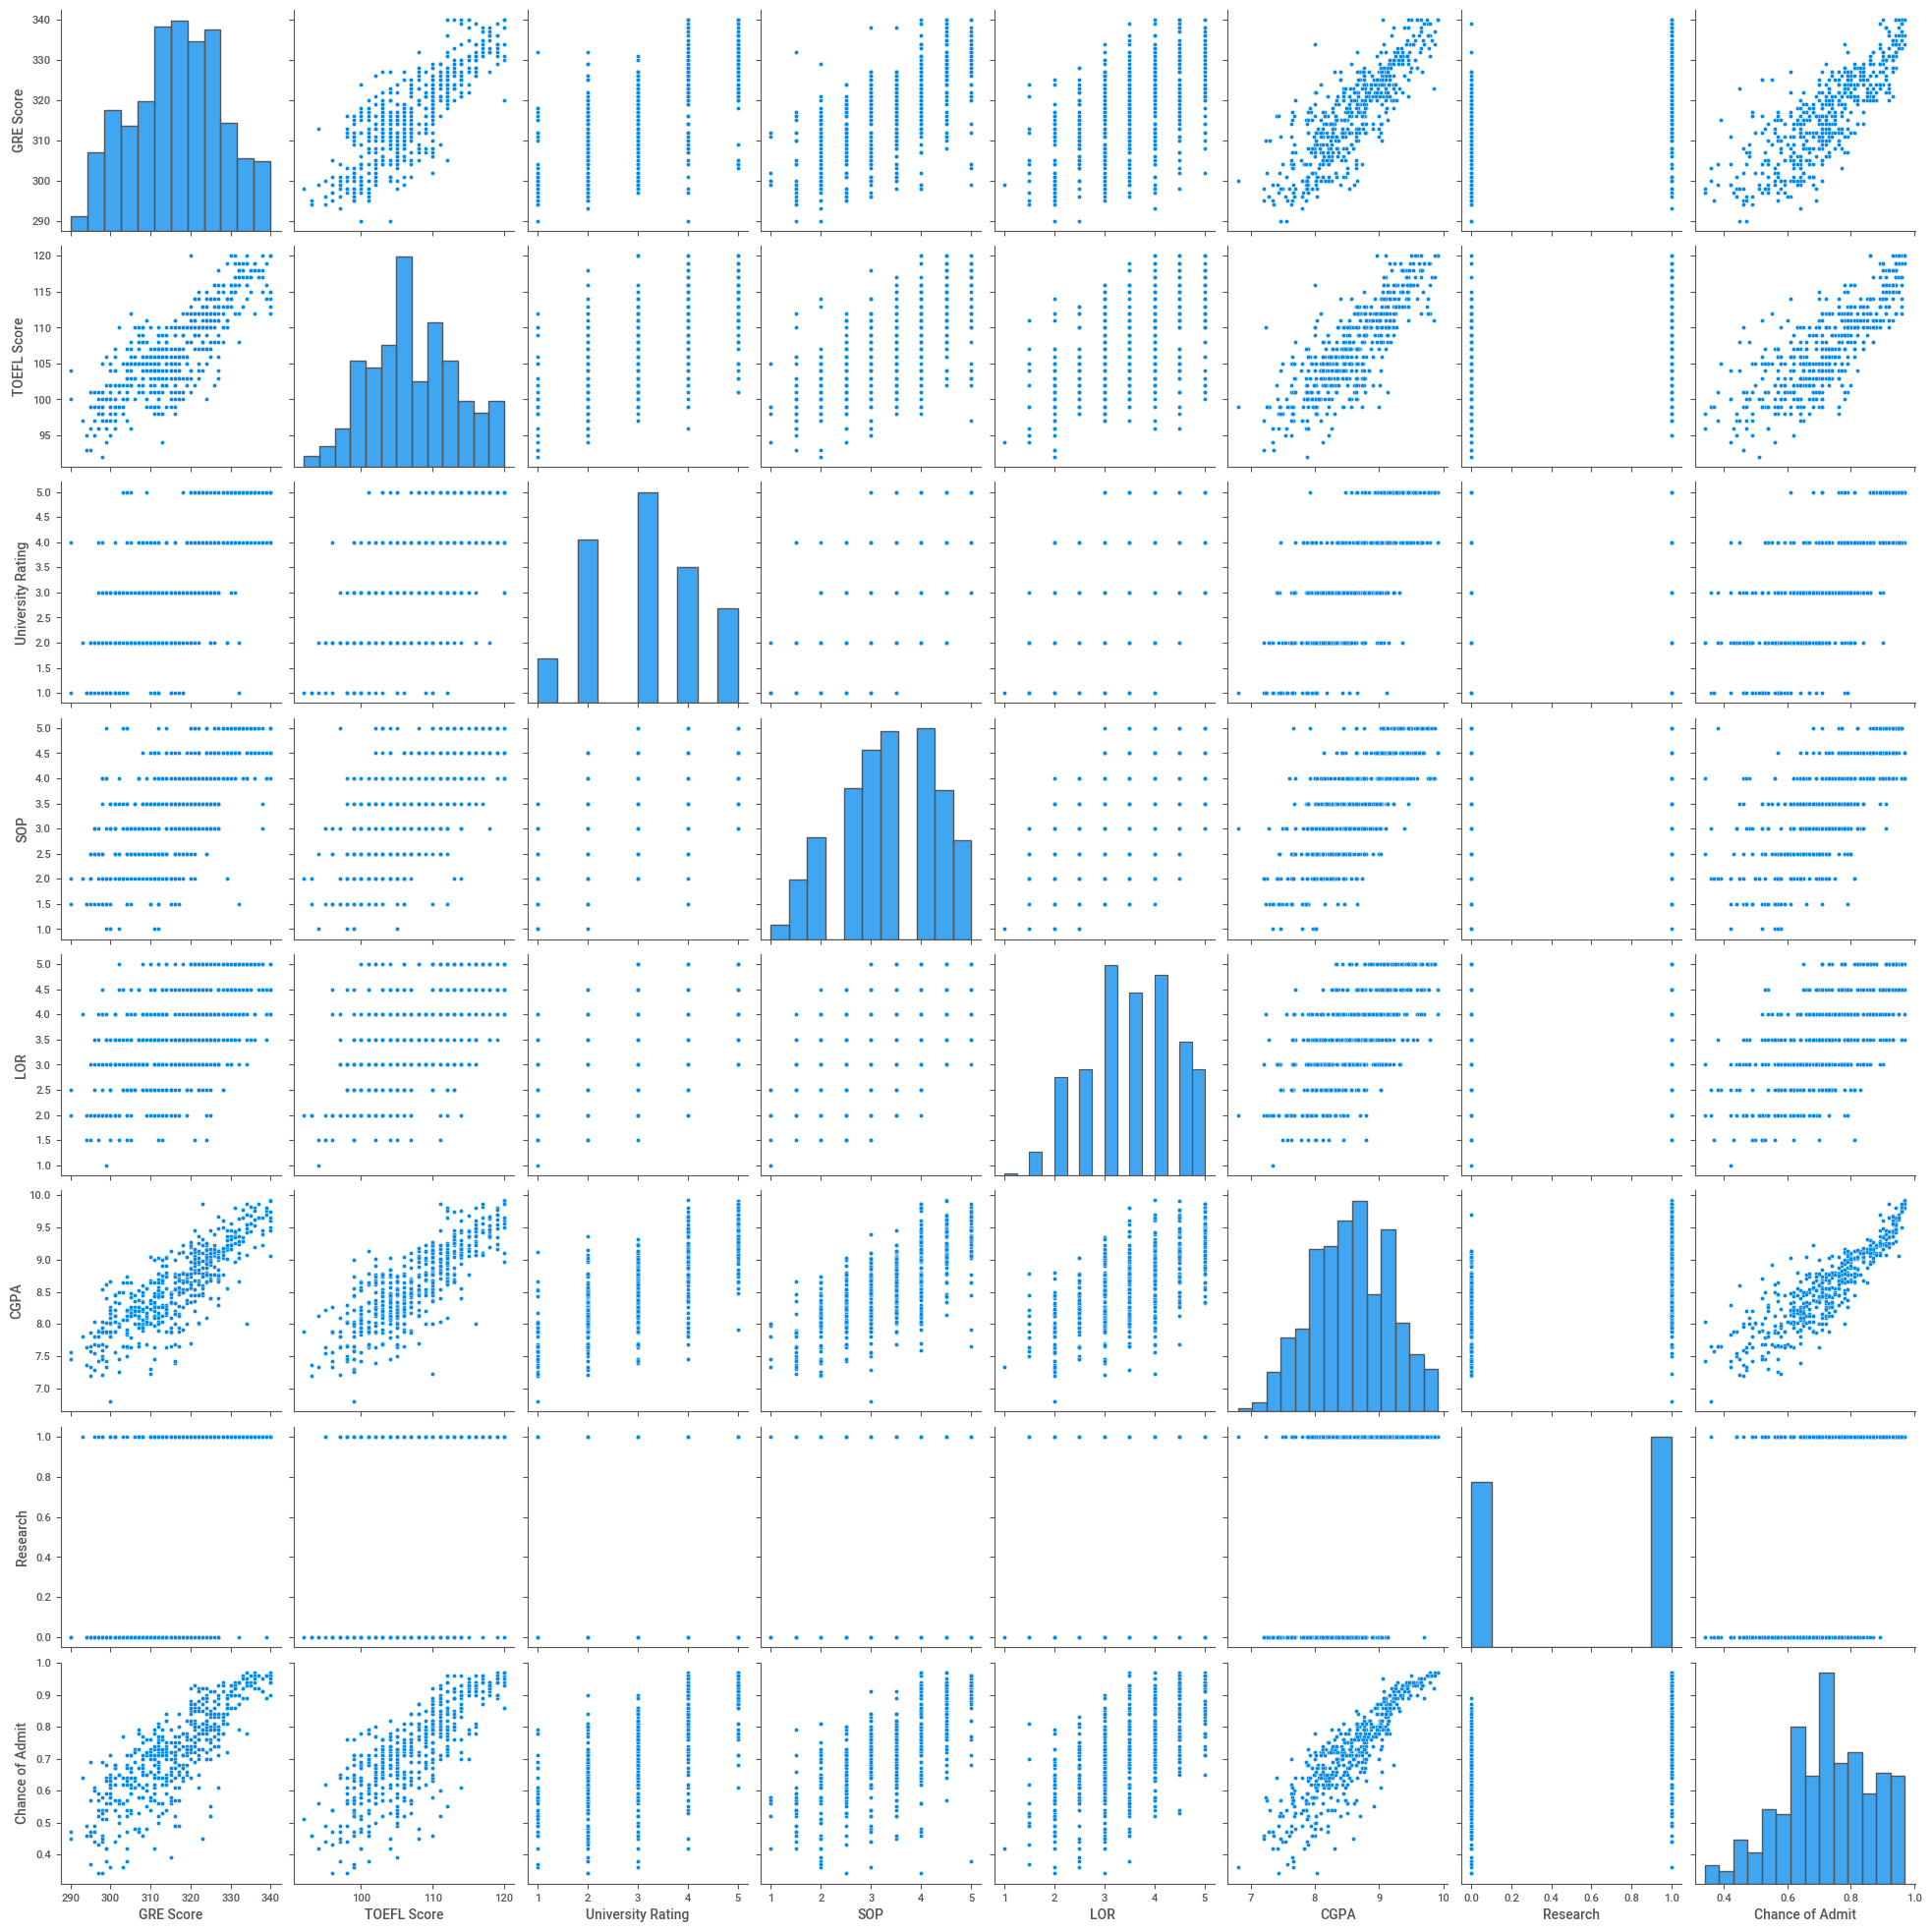

In [ ]:
sns.pairplot(df)
plt.show()

___
**Observations:**
- Higher GRE Score, TOEFL Score, SOP, LOP, CGPA, Research Experience have higher chances of getting an Admit
___

### **Simple Linear Regression**

We obtain a relationship between 2 variables x & y by predicting the value of y based on x

**x** - Independent Variable

**y** - Dependent Variable (Target Variable/ Output Variable)

It is called **Simple Linear Regression** because it examines relationship between 2 variables only

Why Linear?

When the Independent Variable increases (or decreases), the dependent variable increases or decreases in a Linear Fashion


In [ ]:
x = df['GRE Score']
y = df['Chance of Admit'] #Target Variable

In [ ]:
print(x.shape, y.shape) 

(500,) (500,)


In [ ]:
#Converting x & y into NumPy Arrays

x = np.array(x)
y = np.array(y)


In [ ]:
x = x.reshape(-1,1)
x.shape

(500, 1)

In [ ]:
y = y.reshape(-1,1)
y.shape

(500, 1)

#### **Scaling the Data**

In [ ]:
#Scaling the Data

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
minmax = MinMaxScaler()

x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

#### **Task 5: Splitting the Dataset Using train_test_split from the sklearn library**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(400, 1) (100, 1) (400, 1) (100, 1)


#### **Task 6: Building a Simple Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### **Evaluating the Model**

In [ ]:
accuracy_lr = lr_model.score(x_test, y_test)
print(accuracy_lr)

0.5860965504584403


Oh. We could achieve an Accuracy of just **58.6%** on the testing data using a Simple Linear Regression Model which is very bad

Let us check the correlation between the variables to understand how they affect the target variable (i.e., **Chance of Admit**)

Pandas **df.corr()** is used to find the pairwise correlation of all columns in the dataframe

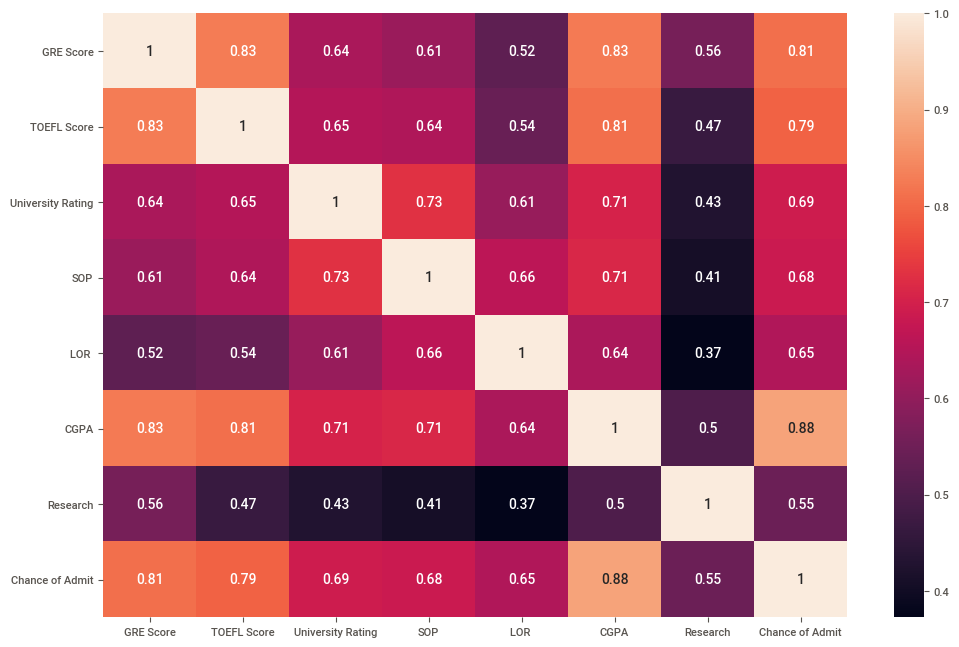

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

___
**Observations:**
- Students who have **High GRE** Score tend to also have high TOEFL Score. That means they are positively correlated
- **CGPA & TOEFL Score** and **Chance of Admit** is also highly correlated which suggests that CGPA & TOEFL Score are very important factors
___

Now, let us try using **multiple features** (for e.g. **GRE Score, TOEFL Score, SOP, LOR, CGPA**, etc.) to predict the **Chance of Admit** using **Multiple Linear Regression**

### **Multiple Linear Regression**

Examines relationship between more than 2 variables

Whoa! This is what we are going to use because we have many dependent variables such as **GRE Score**, **TOEFL Score**, etc and one independent(or target varible) **Chance of Admit**


In [ ]:
x = df.drop(columns = ['Chance of Admit'])
y = df['Chance of Admit'] #Target Variable

In [ ]:
print(x.shape, y.shape) 

(500, 7) (500,)


In [ ]:
print(type(x), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [ ]:
#Converting x & y into NumPy Arrays

x = np.array(x)
y = np.array(y)


In [ ]:
y = y.reshape(-1,1)
y.shape

(500, 1)

#### **Scaling the data**

In [ ]:
#Scaling the Data

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
minmax = MinMaxScaler()

x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

#### **Splitting the data using the train_test_split function from the sklearn library**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(400, 7) (100, 7) (400, 1) (100, 1)


#### **Task 7: Train & Evaluate a Linear Regression Model**



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
accuracy_lr = lr_model.score(x_test, y_test)
print(accuracy_lr)

0.8188432567829627


Okay, good! We achieved an Accuracy of **81%** on the testing data using a Multiple Linear Regression Model.